In [2]:
import numpy as np
import sklearn as sklearn

all_list = np.genfromtxt("data0.txt",dtype='i4')
np.random.shuffle(all_list)

print all_list


[[ 2  8  1]
 [ 8  8  3]
 [ 8  9  3]
 [10  2  2]
 [ 1  8  1]
 [ 3  9  1]
 [ 1  1  0]
 [ 9  8  3]
 [ 4 10  1]
 [ 4  1  0]
 [ 3 10  1]
 [ 2  9  1]
 [10  9  3]
 [ 7  9  3]
 [ 8  2  2]
 [ 4  3  0]
 [ 3  3  0]
 [ 4  9  1]
 [ 9  1  2]
 [ 1  6  1]
 [ 2  1  0]
 [ 3  2  0]
 [ 2  2  0]
 [ 4  2  0]
 [ 7 10  3]
 [ 8  1  2]
 [ 1  2  0]
 [ 2  3  0]
 [10  1  2]
 [10 10  3]
 [ 1  7  1]
 [ 5 10  1]
 [ 9  9  3]
 [ 1  3  0]
 [ 1 10  1]
 [ 2  7  1]
 [ 7  8  3]
 [ 9  2  2]
 [ 1  9  1]
 [ 8 10  3]
 [ 8  3  2]
 [10  8  3]
 [ 2 10  1]
 [ 9 10  3]
 [ 3  1  0]
 [10  3  2]
 [ 9  3  2]
 [ 3  8  1]]


In [3]:
def multiclassperceptron(data, label): # somelist should be in just x and label should be just containing labels
    check = True
    w = [[0,0], [0,0], [0,0], [0,0]]
    b = [0, 0, 0, 0]
    classes = []
    while(check):
        check = False
        doublecheck = False
        for i in range(len(data)):
            classes = []
            classes.append(w[0][0]*data[i][0]+w[0][1]*data[i][1]+b[0]) # class0
            classes.append(w[1][0]*data[i][0]+w[1][1]*data[i][1]+b[1]) # class1
            classes.append(w[2][0]*data[i][0]+w[2][1]*data[i][1]+b[2]) # Class2
            classes.append(w[3][0]*data[i][0]+w[3][1]*data[i][1]+b[3]) # class3
            predicted = classes.index(max(classes))
          #  print predicted, label[i], classes
            if(predicted != label[i]):
                w[predicted][0] -= data[i][0]
                w[predicted][1] -= data[i][1]
                b[predicted] -= 1
                w[label[i]][0] += data[i][0]
                w[label[i]][1] += data[i][1]
                b[label[i]] += 1
                doublecheck = True
        if(doublecheck == True):
            check = True
    return w, b

In [4]:
#data slicing
x_data = []
y_label = []
for a in range(len(all_list)):
    data_temp = []
    label_temp = []
    data_temp.append(all_list[a][0])
    data_temp.append(all_list[a][1])
    y_label.append(all_list[a][2])
    x_data.append(data_temp)

In [5]:
# run multiclass
w, b = multiclassperceptron(x_data, y_label)
print w, b

[[5, -8], [-47, 36], [33, -36], [9, 8]] [75, -19, -23, -33]


C:\Python27\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


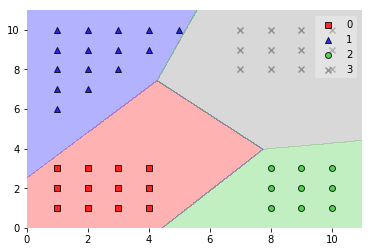

In [6]:
import matplotlib.pyplot as plt
from sklearn.linear_model import perceptron
from mlxtend.plotting import plot_decision_regions

graph = perceptron.Perceptron(n_iter=100)
graph.coef_ = w
graph.intercept_ = b
graph.fit(x_data,y_label)
plot_decision_regions(np.array(x_data), np.array(y_label), clf=graph)
plt.show()

In [ ]:
'''
https://stats.stackexchange.com/questions/71335/decision-boundary-plot-for-a-perceptron

import numpy as np
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt

X = np.array([[2,1],[3,4],[4,2],[3,1]])
Y = np.array([0,0,1,1])
h = .02  # step size in the mesh


# we create an instance of SVM and fit our data. We do not scale our
# data since we want to plot the support vectors

clf = Perceptron(n_iter=100).fit(X, Y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
fig, ax = plt.subplots()
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=plt.cm.Paired)
ax.axis('off')

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

ax.set_title('Perceptron')
'''